In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# python librairies installation
!pip install split-folders matplotlib opencv-python spicy

In [ ]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
# define classes name
class_names = ['ants','bees']

In [ ]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/path/your/train/data",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 244 images belonging to 2 classes.


In [ ]:
# validation data
valid_generator = datagen.flow_from_directory(
    directory="/path/your/val/data",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 153 images belonging to 2 classes.


In [ ]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [ ]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
8/8 [==============================] - 139s 18s/step - loss: 1.3501 - accuracy: 0.5656 - val_loss: 0.6267 - val_accuracy: 0.6928
Epoch 2/10
8/8 [==============================] - 3s 370ms/step - loss: 1.4339 - accuracy: 0.5410 - val_loss: 0.6516 - val_accuracy: 0.6013
Epoch 3/10
8/8 [==============================] - 3s 385ms/step - loss: 1.0453 - accuracy: 0.6025 - val_loss: 0.6193 - val_accuracy: 0.7124
Epoch 4/10
8/8 [==============================] - 3s 361ms/step - loss: 0.8445 - accuracy: 0.5902 - val_loss: 0.5705 - val_accuracy: 0.8366
Epoch 5/10
8/8 [==============================] - 3s 368ms/step - loss: 0.7483 - accuracy: 0.6557 - val_loss: 0.5057 - val_accuracy: 0.8039
Epoch 6/10
8/8 [==============================] - 3s 364ms/step - loss: 0.7997 - accuracy: 0.5861 - val_loss: 0.4485 - val_accuracy: 0.8954
Epoch 7/10
8/8 [==============================] - 5s 607ms/step - loss: 0.6033 - accuracy: 0.6844 - val_loss: 0.4301 - val_accuracy: 0.8627
Epoch 8/10
8/8 [====

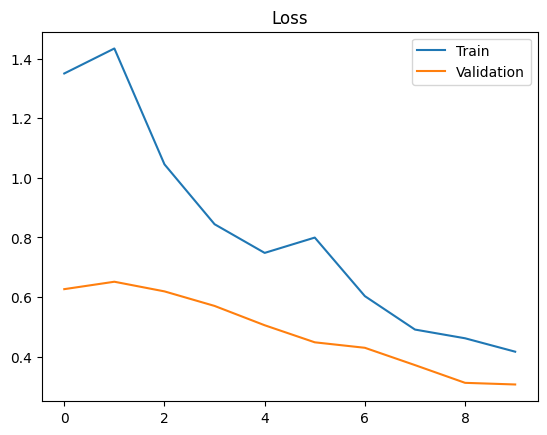

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

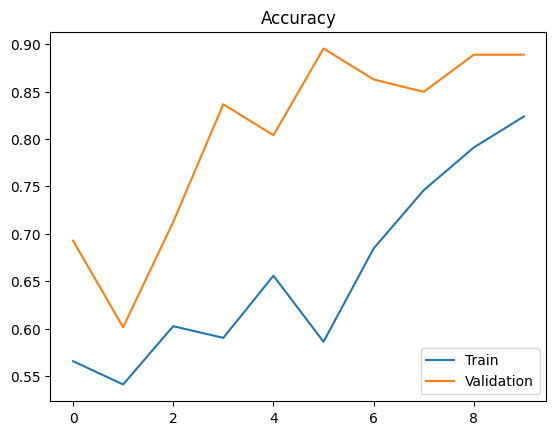

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/download.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
img_array

array([[[[119., 156.,  51.],
         [120., 157.,  52.],
         [120., 157.,  51.],
         ...,
         [ 85., 141.,  66.],
         [ 86., 142.,  67.],
         [ 86., 142.,  67.]],

        [[119., 156.,  51.],
         [119., 156.,  51.],
         [120., 157.,  51.],
         ...,
         [ 85., 141.,  66.],
         [ 86., 142.,  67.],
         [ 86., 142.,  67.]],

        [[119., 156.,  51.],
         [119., 156.,  51.],
         [120., 157.,  52.],
         ...,
         [ 85., 141.,  66.],
         [ 85., 141.,  66.],
         [ 85., 141.,  66.]],

        ...,

        [[131., 177., 130.],
         [131., 177., 130.],
         [131., 177., 130.],
         ...,
         [ 91., 143.,  33.],
         [104., 152.,  43.],
         [105., 150.,  45.]],

        [[131., 177., 130.],
         [131., 177., 130.],
         [131., 177., 130.],
         ...,
         [ 84., 141.,  24.],
         [ 93., 146.,  32.],
         [ 95., 145.,  32.]],

        [[131., 177., 130.],
       

In [ ]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[0.20819232 0.79180765]]


In [ ]:
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [ ]:
# transform classes number into classes name
class_names[class_id.item()]

'bees'

In [ ]:
model.save('/path/your/output')

In [ ]:
model = tf.keras.models.load_model('/path/your/model/weight')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# Original model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dr_Norouzi/output')

# Add layers to extract feature maps
x = model.layers[-11].output
feature_map1 = tf.keras.layers.Lambda(lambda x: x)(x)

# x = model.layers[-4].output
# feature_map2 = tf.keras.layers.Lambda(lambda x: x)(x)

new_model = tf.keras.Model(inputs=model.input, outputs=[model.output, feature_map1])

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/download.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
features = new_model.predict(img_array)
fm1 = features[1] # feature map from dense layer 1
#fm2 = features[2] # feature map from dense layer 2

1/1 [==============================] - 1s 929ms/step


In [ ]:
print("fm1:",fm1)
#print("fm2:",fm2)

fm1: [[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[1.4165103  0.         0.         ... 0.         0.
    0.        ]
   [3.1858602  0.         0.         ... 0.         0.300544
    0.        ]
   [0.8037281  0.         0.         ... 0.         0.8505314
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.7445862  0.         0.817128   ... 0.         0.
    0.        ]
   [6.5168223  0.         1.4684073  ... 